In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('athlete_events.csv')
df_region = pd.read_csv('noc_regions.csv')

In [3]:
df =df[df['Season']=='Summer']

In [4]:
df =df.merge(df_region,on='NOC',how='left')

In [5]:
df['region'].unique().shape

(206,)

In [6]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [7]:
df.duplicated().sum()

1385

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [10]:
df =pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [11]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [12]:
# df.groupby('NOC').sum()[['Gold',"Silver",'Bronze']].sort_values('Gold',ascending=False).reset_index()

In [13]:
# df[(df['NOC']=='IND')&(df['Medal']=='Gold')]
# medal_tally = df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Medal','Event',])
# medal_tally = medal_tally.groupby('NOC').sum()[['Gold',"Silver",'Bronze']].sort_values('Gold',ascending=False).reset_index()
# medal_tally['total']=medal_tally['Gold']+medal_tally['Bronze']+medal_tally['Silver']

In [14]:
# medal_tally

In [11]:
def fetch_medal_tally(df,year,country):
    medal_tally = df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Medal','Event',])
    flag =0
    if year=='Overall' and country == "Overall":
        temp_df = medal_tally
    elif year != 'Overall' and country == 'Overall':
        temp_df = medal_tally[medal_tally['Year'] == int(year)]
    elif year == 'Overall' and country != 'Overall':
        flag =1
        temp_df = medal_tally[medal_tally['region'] == country]
    elif year != 'Overall' and country != 'Overall':
        temp_df = medal_tally[(medal_tally['Year'] == int(year)) & (medal_tally['region']==country)]
    if flag ==1:
        x= temp_df.groupby('Year').sum()[['Gold',"Silver",'Bronze']].sort_values('Year',ascending=True).reset_index()
    else:        
        x= temp_df.groupby('region').sum()[['Gold',"Silver",'Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['total']=x['Gold']+x['Bronze']+x['Silver']
    return x


In [16]:
# fetch_medal_tally(df,'Overall','India')

In [12]:
editions=df.Name.unique().shape[0]
cities=df.region.unique().shape[0]
sports=df.Event.unique().shape[0]
events=df.Sport.unique().shape[0]
athletes=df.City.unique().shape[0]
nations=df.Year.unique().shape[0]-1


In [23]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index()
nations_over_time.rename(columns={'Year':'year','count':'n_country'},inplace=True)


,Year,count
0,2016,204
1,2012,203
2,2008,202
3,2004,200
4,2000,199
5,1996,196
6,1992,168
7,1988,156
8,1984,139
9,1972,120


In [61]:
temp_df =df.dropna(subset=['Medal'])
temp_df = temp_df[temp_df['region'] == "USA"]
temp_df =temp_df['Name'].value_counts().reset_index().head(15).merge(df,on='Name',how='left')[['Name','Sport','count']].drop_duplicates('Name')
temp_df.rename(columns={'count':'Medal'},inplace=True)
temp_df.reset_index()
temp_df

,Name,Sport,Medal
0,"Michael Fred Phelps, II",Swimming,28
30,Ryan Steven Lochte,Swimming,12
44,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,12
61,Natalie Anne Coughlin (-Hall),Swimming,12
73,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,12
86,"Matthew Nicholas ""Matt"" Biondi",Swimming,11
98,Carl Townsend Osburn,Shooting,11
114,Mark Andrew Spitz,Swimming,11
126,"Raymond Clarence ""Ray"" Ewry",Athletics,10
136,"Frederick Carlton ""Carl"" Lewis",Athletics,10


In [19]:
events_over_time = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')
events_over_time.rename(columns={'index':'year','Year':'events'},inplace=True)

In [20]:
# import plotly.express as px
# fig = px.line(events_over_time,x='year',y='events')
# fig.show()

In [21]:
import seaborn as sns


In [22]:
import matplotlib.pyplot as plt


In [23]:
# x =df.drop_duplicates(['Year','Sport','Event'])
# plt.figure(figsize=(20,20))
# sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)
# plt.show()

In [24]:
# def most_successful(df,sport):
#     temp_df =df.dropna(subset=['Medal'])
#     if sport != 'Overall':
#         temp_df = temp_df[temp_df['Sport'] == sport]
#     x =temp_df.groupby('Name').sum()[['Gold','Bronze','Silver']]
#     x['total']=x['Gold']+x['Bronze']+x['Silver']
#     x =x.sort_values('total',ascending=False)
#     return x.reset_index()

In [25]:
import plotly.express as px

In [26]:
# temp_df =df.dropna(subset=['Medal'])
# temp_df = temp_df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Medal','Event',])
# temp_df = temp_df[temp_df['region']=='USA']
# temp_df =temp_df.groupby('Year').sum().reset_index()
# temp_df
# fig = px.line(temp_df,x='Year',y=['Gold','Silver','Bronze'],color_discrete_sequence=['Gold', 'Silver','#cd7f32'])
# fig.show()



In [27]:
# temp_df =df.dropna(subset=['Medal'])
# temp_df = temp_df.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Medal','Event',])
# temp_df = temp_df[temp_df['region']=='UK']
# temp_df =temp_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0)
# plt.figure(figsize=(25,25))
# sns.heatmap(temp_df,annot=True)

In [28]:
def most_successful(df,Country):
    temp_df =df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == Country]
    temp_df =temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on ='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    return temp_df
most_successful(df,'India')

,index,Name_x,Sport
0,Udham Singh Kular,4,Hockey
4,Leslie Walter Claudius,4,Hockey
8,Shankar Pillay Laxman,3,Hockey
11,Ranganathan Francis,3,Hockey
14,Richard James Allen,3,Hockey
17,Balbir Singh,3,Hockey
20,Harbinder Singh Chimni,3,Hockey
23,"Balbir Singh Dosanjh, Sr.",3,Hockey
26,"Victor John ""V. J."" Peter",3,Hockey
29,Dhyan Chand Bais,3,Hockey


In [29]:
import plotly.figure_factory as ff

In [30]:
temp_df =df.drop_duplicates(['Name','region'])
x1 =temp_df['Age'].dropna()
x2= temp_df[temp_df['Medal']=='Gold']['Age'].dropna()
x3= temp_df[temp_df['Medal']=='Silver']['Age'].dropna()
x4= temp_df[temp_df['Medal']=='Bronze']['Age'].dropna()
fig =ff.create_distplot([x1,x2,x3,x4],['Age Distribution','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug =False)
fig.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



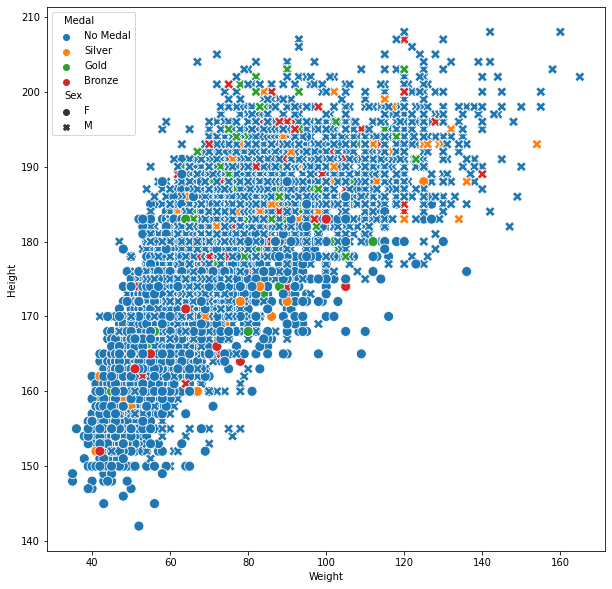

In [31]:
temp_df =df.drop_duplicates(['Name','region'])
temp_df = temp_df[temp_df['Sport']=='Athletics']
temp_df['Medal'].fillna('No Medal',inplace=True)
plt.figure(figsize=(10,10))
sns.scatterplot(temp_df['Weight'],temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)
plt.show()

In [47]:
temp_df =df.drop_duplicates(['Name','region'])
men = temp_df[temp_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women = temp_df[temp_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()
final =women.merge(men,on='Year',how='right')
final.fillna(0,inplace=True)
final.rename(columns={'Name_x':'Female','Name_y':'Male'},inplace=True)

In [51]:
fig = px.line(final,x='Year',y=['Female','Male'])
fig.show()